## 6. Caso (2 puntos, Nivel medio)
El conjunto de datos son datos utilizados para la aprobación de crédito y se pueden descargar del repositorio de Universidad de California en Irvine. [Credit Approval Data Set](http://archive.ics.uci.edu/ml/datasets/Credit+Approval)

In [569]:
import pandas as pd

X_6 = pd.read_csv('crx_data.txt', sep = ',')

La documentación del conjunto de datos indica que tiene 15 características y una variable objetivo (A16) que indica si el crédito se debe aprobar o no. Concretamente la información del archivo indica los siguiente:

    Attribute Information:
    ------------------------
    A1: b, a. 
    A2: continuous. 
    A3: continuous. 
    A4: u, y, l, t. 
    A5: g, p, gg. 
    A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff. 
    A7: v, h, bb, j, n, z, dd, ff, o. 
    A8: continuous. 
    A9: t, f. 
    A10: t, f. 
    A11: continuous. 
    A12: t, f. 
    A13: g, p, s. 
    A14: continuous. 
    A15: continuous. 
    A16: +,- (class attribute)

Ahora crear un modelo de regresión logística y un modelo de ensemble con una regresión logística, una maquina vector soporte y un árbol de decisión, seleccionando los hiperparámetros de los modelos.

Responder a las siguientes preguntas:

1.	¿Cuál es la precisión del modelo de regresión logística?
2.	¿En cuanto mejora la precisión del modelo de ensemble respecto a la regresión logística? ¿Cuál de los modelos crees que es mejor?


### Solución

In [719]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV



X_6 = pd.read_csv('crx_data.txt', sep = ',')

'''Le echamos un vistazo a los datos'''
print(X_6.head(), "\n" * 3)


'''Luego a la estructura'''
print(X_6.info(), "\n" * 3)
'''Vemos que hay varios campos object (string) y numéricos'''

'''vamos a ver si hay valores nulos'''
print("Valores nulos en el dataframe: ", X_6.isnull().sum().sum(), "\n" * 3)
'''parece que no hay valores nulos'''

'''ahora voy a estudiar el intervalo de valores de cada una de las variables en el dataframe'''
diferentes_valores = []
for col in X_6:
    
    diferentes_valores.append(X_6[col].value_counts(dropna=False))
    
print(diferentes_valores, "\n" * 3)



'''observamos que hay muchos registros con el valor ?, vamos a ver cuántos'''
print("Valores ? en el dataframe: ", (X_6.values == '?').sum() ,  "\n" * 3)

print("Hay 67, distribuidos en lascolumnas de la siguiente manera, luego lo solucionamos \n")

numero_interro = {}
tipo_col = {}
numer = 0
for col in X_6:
    
        numer =len(X_6[(X_6[col]== '?')])
       
        if numer > 0 :
            numero_interro[col]= numer
            tipo_col[col]= numer
            
        
print(numero_interro, "\n" * 3)



'''Ahora voy a ver cuantas filas tienen más de 3 valores nulos'''

print(len(X_6[(X_6.values == '?').sum(axis = 1)>3]))

'''Son 6 , no son muchas, pero las elimino'''
X_6.drop(X_6[(X_6.values == '?').sum(axis = 1)>3].index, inplace = True)





  A1     A2     A3 A4 A5 A6 A7    A8 A9 A10  A11 A12 A13    A14  A15 A16
0  b  30.83  0.000  u  g  w  v  1.25  t   t    1   f   g  00202    0   +
1  a  58.67  4.460  u  g  q  h  3.04  t   t    6   f   g  00043  560   +
2  a  24.50  0.500  u  g  q  h  1.50  t   f    0   f   g  00280  824   +
3  b  27.83  1.540  u  g  w  v  3.75  t   t    5   t   g  00100    3   +
4  b  20.17  5.625  u  g  w  v  1.71  t   f    0   f   s  00120    0   + 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11 

In [722]:
'''Observando los valores de la columna A2, que es del tipo string, podemos observar que tienen el formato doble, aunque 
también contiene el comodín ?, vamos a sustituirlo y a cambiar el tipo de la columna
'''

'''sustituyo el interrogante por el valor de la media de la columna'''
X_6.A2.replace('?', np.nan, inplace = True)


'''le cambio el tipo de string a float'''
X_6.A2= X_6.A2.astype(float)  

'''sustituyo los nan con la media de la columna'''
X_6.A2.fillna(value=X_6.A2.mean(), inplace=True)

print(X_6.info())




<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      684 non-null    object 
 1   A2      684 non-null    float64
 2   A3      684 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      684 non-null    object 
 6   A7      684 non-null    object 
 7   A8      684 non-null    float64
 8   A9      684 non-null    object 
 9   A10     684 non-null    object 
 10  A11     684 non-null    int64  
 11  A12     684 non-null    object 
 12  A13     684 non-null    object 
 13  A14     684 non-null    object 
 14  A15     684 non-null    int64  
 15  A16     684 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 90.8+ KB
None


In [723]:

'''ahora le echo un vistazo a la variable objetivo que tiene dos valores (+,-)'''
print(X_6['A16'].value_counts())


'''sustituyo sus valores por 0 y 1, porque luego puedo tener problemas al obtener los scores'''
X_6.A16= np.where(X_6.A16== "+", 1, 0)


'''creo una variable target'''
target = X_6.A16

''' elimino la columna que he guardado en target del dataframe original'''
X_6.drop(['A16'], axis = 1, inplace = True)

''''''

'''ahora, lo que voy a hacer, sabiendo que todas las columnas con ?s son string es aplicar un Simpleimputer
con el valor más frecuente'''


imputer = SimpleImputer(missing_values= '?', strategy='most_frequent')
for col in X_6.columns:
    
    if (X_6[col] == '?').any() :
        X_6[col] = imputer.fit_transform(X_6[col].values.reshape(-1,1))[:,0]  

        

'''Nos podríamos haber ahorrado trabajo leyendo el dataset con la instrucción siguiente, pero primero había que 
saber que los interrogantes estaban ahí: X_6 = pd.read_csv('crx_data.txt', sep = ',' , na_values='?')'''



-    381
+    303
Name: A16, dtype: int64


"Nos podríamos haber ahorrado trabajo leyendo el dataset con la instrucción siguiente, pero primero había que \nsaber que los interrogantes estaban ahí\n#X_6 = pd.read_csv('crx_data.txt', sep = ',' , na_values='?')"

In [724]:

'''ahora para trabajar un poco mejor creo dos dataframes, uno con las variables numéricas y otro con las categóricas'''
X_6_num = X_6.select_dtypes(exclude = 'object')
X_6_cat = X_6.select_dtypes(include = 'object')
print(X_6_cat.head())
print(X_6_num.head())

'''voy a ver cuantos valores únicos tienen las columnas categóricas porque influira en el número de
columnas dummies que se me van a a generar'''

for col in X_6_cat:
  print(col , len(X_6_cat[col].unique()))

'''La columna A14 tiene 170 valores que nos van a generar casi el mismo número de dummies,
lo cierto es que son muchas columnas pero creo que si no la incluimos en el modelo
podemos perder información. Habrá que tratar de reducir el número final de columnas que
introducimos en el modelo.'''

'''creo un dataframe de dummies para esas categóricas, eliminando uno de los valores, evitando asi la colinealidad'''
X_6_cat_dum = pd.get_dummies(X_6_cat, drop_first = True)


'''los datos finales los obtendremos concatenando las columnas numericas y las dummies'''
data = pd.concat([X_6_num, X_6_cat_dum], axis = 1)
print(data.shape)




  A1 A4 A5 A6 A7 A9 A10 A12 A13    A14
0  b  u  g  w  v  t   t   f   g  00202
1  a  u  g  q  h  t   t   f   g  00043
2  a  u  g  q  h  t   f   f   g  00280
3  b  u  g  w  v  t   t   t   g  00100
4  b  u  g  w  v  t   f   f   s  00120
      A2     A3    A8  A11  A15
0  30.83  0.000  1.25    1    0
1  58.67  4.460  3.04    6  560
2  24.50  0.500  1.50    0  824
3  27.83  1.540  3.75    5    3
4  20.17  5.625  1.71    0    0
A1 2
A4 3
A5 3
A6 14
A7 9
A9 2
A10 2
A12 2
A13 3
A14 170
(684, 205)


In [725]:
from sklearn.linear_model import LinearRegression
def calculate_vif(data):
    features = list(data.columns)
    num_features = len(features)
    
    model = LinearRegression()
    
    result = pd.DataFrame(index = ['VIF'], columns = features)
    result = result.fillna(0)
    
    for ite in range(num_features):
        x_features = features[:]
        y_featue = features[ite]
        x_features.remove(y_featue)
        
        x = data[x_features]
        y = data[y_featue]
        
        model.fit(data[x_features], data[y_featue])
        
        if model.score(data[x_features], data[y_featue]) == 1:
            result[y_featue] = float("inf")
        else:
            result[y_featue] = 1/(1 - model.score(data[x_features], data[y_featue]))
    
    return result

#Esta otra función se apoya en la anterior, y recalcula con las columnas existentes
#eliminando la variable con el VIF mayor y superior a 5
#hasta que genera un dataframe con las variables con un VIF adecuado.


def select_data_using_vif(data, max_VIF = 5):
    result = data.copy(deep = True)
    
    VIF = calculate_vif(result)
    valores_vif = VIF.copy(deep = True)
    lista = []
    while VIF.values.max() > max_VIF:
        
        col_max = np.where(VIF == VIF.values.max())[1][0]
        features = list(result.columns)
        features.remove(features[col_max])
        result = result[features]        
        VIF = calculate_vif(result)
        valores_vif = pd.concat([valores_vif, VIF], axis = 0)
    return result, valores_vif




#genero el modelo definitivo con las columnas que, tras el análisis tienen un VIF menor de 5
modelo = select_data_using_vif(data)[0]
print(modelo) 
#nos ha eliminado 5 columnas, el dataset queda grande todavía

#print(select_data_using_vif(data)[1])

        A2      A3    A8  A11  A15  A1_b  A5_gg  A5_p  A6_c  A6_cc  ...  \
0    30.83   0.000  1.25    1    0     1      0     0     0      0  ...   
1    58.67   4.460  3.04    6  560     0      0     0     0      0  ...   
2    24.50   0.500  1.50    0  824     0      0     0     0      0  ...   
3    27.83   1.540  3.75    5    3     1      0     0     0      0  ...   
4    20.17   5.625  1.71    0    0     1      0     0     0      0  ...   
..     ...     ...   ...  ...  ...   ...    ...   ...   ...    ...  ...   
685  21.08  10.085  1.25    0    0     1      0     1     0      0  ...   
686  22.67   0.750  2.00    2  394     0      0     0     1      0  ...   
687  25.25  13.500  2.00    1    1     0      0     1     0      0  ...   
688  17.92   0.205  0.04    0  750     1      0     0     0      0  ...   
689  35.00   3.375  8.29    0    0     1      0     0     1      0  ...   

     A14_00640  A14_00680  A14_00711  A14_00720  A14_00760  A14_00840  \
0            0          0 

In [726]:
'''generamos los subconjuntos de datos para el modelo'''
X6train, X6test, y6train, y6test = train_test_split(modelo, target, random_state=seed, test_size=0.30)

'''vamos a mejorar la calidad de los datos aplicando un scaler que nos dejara los valores entre 0 y 1'''
min_max_scale = MinMaxScaler()
X_train_mm = min_max_scale.fit_transform(X6train)
X_test_mm = min_max_scale.transform(X6test)

'''asi queda el modelo transformado'''
df_x_train = pd.DataFrame(X_train_mm, columns = modelo.columns )
print(df_x_train.head())

         A2        A3        A8    A11       A15  A1_b  A5_gg  A5_p  A6_c  \
0  0.323308  0.113036  0.131579  0.000  0.000000   1.0    0.0   0.0   0.0   
1  0.126617  0.020893  0.000000  0.000  0.000000   1.0    0.0   1.0   0.0   
2  0.096541  0.330357  0.058421  0.075  0.000548   1.0    0.0   0.0   1.0   
3  0.216842  0.004464  0.002982  0.000  0.041096   1.0    0.0   1.0   0.0   
4  0.340902  0.026786  0.020526  0.000  0.000059   1.0    0.0   1.0   0.0   

   A6_cc  ...  A14_00640  A14_00680  A14_00711  A14_00720  A14_00760  \
0    0.0  ...        0.0        1.0        0.0        0.0        0.0   
1    0.0  ...        0.0        0.0        0.0        0.0        0.0   
2    0.0  ...        0.0        0.0        0.0        0.0        0.0   
3    0.0  ...        0.0        0.0        0.0        0.0        0.0   
4    0.0  ...        0.0        0.0        0.0        0.0        0.0   

   A14_00840  A14_00928  A14_00980  A14_01160  A14_02000  
0        0.0        0.0        0.0        0.0

In [727]:

Regresion_logistica = LogisticRegression().fit(X_train_mm, y6train)
prediccion_y6test = Regresion_logistica.predict(X_test_mm )

#de la regresion logistica solo
print(f'Precisión: { round(accuracy_score(y6test, prediccion_y6test),3) }')
print(f'Exactitud: { round(precision_score(y6test, prediccion_y6test),3)}')
print(f'Exhaustividad: { round(recall_score(y6test, prediccion_y6test),3) }')
print(f'F1: { round(f1_score(y6test, prediccion_y6test),3) }')


Precisión: 0.864
Exactitud: 0.824
Exhaustividad: 0.894
F1: 0.857


[9.99992646e-01 5.23871247e-06 1.06847777e-06 6.49582656e-07
 2.93460724e-07 1.02704861e-08 9.20572131e-09 7.72964029e-09
 6.56463934e-09 6.24919044e-09 5.70752473e-09 4.74067553e-09
 3.39871499e-09 3.18522629e-09 3.05056869e-09 2.75815635e-09
 2.58159763e-09 2.14516500e-09 2.06277648e-09 1.83596830e-09
 1.78289129e-09 1.74171467e-09 1.68561209e-09 1.59803464e-09
 1.54149912e-09 1.49707667e-09 1.26093631e-09 1.05483980e-09
 8.80014973e-10 8.27759285e-10 7.64220808e-10 7.32630763e-10
 6.94656586e-10 6.21722132e-10 5.49540264e-10 4.70341292e-10
 4.52951671e-10 4.32456602e-10 3.64696489e-10 3.59888824e-10
 3.45179785e-10 3.32197989e-10 2.52136187e-10 2.38767325e-10
 2.12991285e-10 2.10271379e-10 2.08979385e-10 2.07945751e-10
 2.03218197e-10 2.02048080e-10 1.99990692e-10 1.93272186e-10
 1.79855674e-10 1.60232661e-10 1.59549404e-10 1.58990267e-10
 1.58397556e-10 1.57362481e-10 1.57156653e-10 1.55583362e-10
 1.54067652e-10 1.52541007e-10 1.51508137e-10 1.50211716e-10
 1.37698054e-10 1.179292

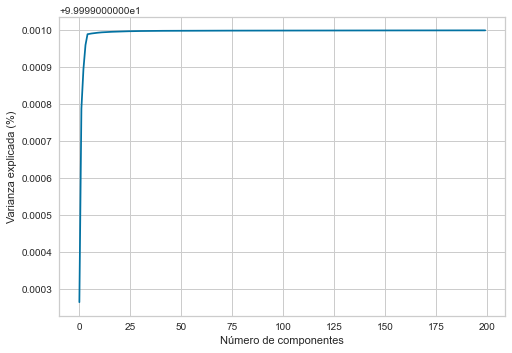

In [728]:
'''como tenemos tantas variables independientes, tras el get-dummies y a pesar de haber restringido por el VIF
voy a hacer un análisis de componentes a ver si podemos reducir el tamaño del modelo'''

#creamos
pcax = PCA()
#entrenamos
pcax.fit(modelo)
#transformamos el dataset
X_pca = pca.fit_transform(modelo)

#según la varianza explicada necesitamos un único componente para la regresión
explained_variance = pcax.explained_variance_ratio_ 
print(explained_variance, "\n"*2)
print(np.cumsum(pcax.explained_variance_ratio_), "\n"*2)

plt.plot(np.cumsum(pcax.explained_variance_ratio_ * 100))
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada (%)")
plt.show()



In [729]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, target, test_size=0.30, random_state=seed)
clfpca = LogisticRegression(max_iter=2500)

# Entrenamos el modelo
clfpca.fit(X_train_pca, y_train)

# Hacemos las predicciones
y_pred = clfpca.predict(X_test_pca) # Predicciones
y_true = y_test # Valores reales

# Medimos los scores
print(f'Precisión: { round(accuracy_score(y_true, y_pred),3) }')
print(f'Exactitud: { round(precision_score(y_true, y_pred),3)}')
print(f'Exhaustividad: { round(recall_score(y_true, y_pred),3) }')
print(f'F1: { round(f1_score(y_true, y_pred),3) }')

''' Los scores nos han salido similares a la regresión logística sobre el modelo modificado según VIF'''

Precisión: 0.859
Exactitud: 0.828
Exhaustividad: 0.872
F1: 0.85


' Los scores nos han salido similares a la regresión logística sobre el modelo modificado según VIF'

In [734]:

'''construimos la lista con los tres modelos con los que vamos a trabajar'''


model = [('logistico', LogisticRegression()), 
         ('tree', DecisionTreeClassifier()),
         ('svc', SVC())]



'''montamos el ensemble con la opción de votación directa'''
ensemble = VotingClassifier(model, voting = 'hard').fit(X_train_mm, y6train)

'''predecimos los resultados'''
pred = ensemble.predict(X_test_mm)

print("El score del ensemble es : ", ensemble.score(x_test_mm, y6test))
print('Precisión: ',  round(accuracy_score(y6test, pred),3) )
print('Exactitud: ', round(precision_score(y6test, pred, average='weighted'),3))
print('Exhaustividad: ',  round(recall_score(y6test, pred, average='weighted'),3) )
print('F1: ', round(f1_score(y6test, pred, average='weighted'),3) )

'''Por poco, los resultados del ensemble son mejores que los de la regresión logística , salvo en la exhaustividad'''

Precisión:  0.859
Exactitud:  0.863
Exhaustividad:  0.859
F1:  0.859


'Por poco, los resultados del ensemble son mejores que los de la regresión logística '

In [743]:

'''aqui monto una tuberia con el kbest y el modelo de regresión logística en el que vario por un lado 
el número de columnas con las que quiero probar el kbest y por otro hago variar el número de 
iteraciones en la regresión'''


pipeline = Pipeline([('kbest', SelectKBest(chi2, k=10)),
                     ('modeloreg', Regresion_logistica)])


params = {'kbest__k': range(1, X_train_mm.shape[1]),
          'modeloreg__max_iter': [500, 1000, 1500, 2500]} 

grid = GridSearchCV(pipeline, params, cv=5).fit(X_train_mm, y6train)


'''Los mejores parámetros que escoge el modelo son'''
print(grid.best_params_)



pred_pip =  grid.predict(X_test_mm)

print('Precisión: ',  round(accuracy_score(y6test,pred_pip),3) )
print('Exactitud: ', round(precision_score(y6test, pred_pip, average='weighted'),3))
print('Exhaustividad: ',  round(recall_score(y6test, pred_pip, average='weighted'),3) )
print('F1: ', round(f1_score(y6test, pred, average='weighted'),3) )



'''Los resultados son muy parecidos al del ensemble'''





{'kbest__k': 5, 'modeloreg__max_iter': 500}
Precisión:  0.854
Exactitud:  0.863
Exhaustividad:  0.854
F1:  0.859


In [745]:


'''Por último construyo otro pipeline con el ensemble'''

pipeline = Pipeline([('kbest', SelectKBest(chi2, k=10)),
                     ('voting', VotingClassifier(model))])

pipeline.fit(X_train_mm, y6train)



params = {'kbest__k': [5,6,7,8,9,10,11,12,13],
          'voting__tree__max_depth': [2, 3, 4, 5],
          'voting__svc__kernel': ['rbf', 'linear'],
          'voting__svc__C': [1, 10, 100],
          'voting__logistico__max_iter': [1500, 2500] } 

grid = GridSearchCV(pipeline, params, cv=5).fit(X_train_mm, y6train)
pred_pip =  grid.predict(X_test_mm)

print('Precisión: ',  round(accuracy_score(y6test,pred_pip),3) )
print('Exactitud: ', round(precision_score(y6test, pred_pip, average='weighted'),3))
print('Exhaustividad: ',  round(recall_score(y6test, pred_pip, average='weighted'),3) )
print('F1: ', round(f1_score(y6test, pred, average='weighted'),3) )

'''Parece que ya no le puedo sacar más partido a la información, a igualdad de scores me quedaría con el ensemble
'''



El score del pipeline es  0.8543689320388349
Precisión:  0.854
Exactitud:  0.863
Exhaustividad:  0.854
F1:  0.859


## 7. Publicidad on-line (3 puntos)
En el archivo `ads.csv` se encuentra la respuesta que ofrecerían los lectores de una web la presencia de 10 diferentes anuncios. En cada una de las filas se muestra 1 si el lector pulsa sobre el anuncio y 0 en caso contrario. Los responsables de la web desean publicar un único anuncio a cada uno de los visitantes y maximizar la respuesta de estos. Para eso nos piden que implementemos un agente que seleccione el anuncio a mostar a cada uno de los visitantes.

Para importar los datos se puede usar el siguiente código:

In [774]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

X_7 = pd.read_csv('ads.csv', sep=';')

Implementa agentes en base a las siguientes estrategias: epsilon-greedy, UCB1, UCB2, Muestreo de Thompson y Bayes. En el caso de epsilon-greedy crea tres agentes con diferentes valores del hiperparámetro epsilon. Una vez hecho, para argumenta la selección de un agente para lo que es necesario responder a las siguientes preguntas.

1. ¿Cuál es la recompensa que podría esperar en caso de que selecciones los anuncios al azar? Para esto crea un implementa un agente cuya estrategia sea seleccionar los anuncios al azara
2. ¿Cuál es la recompensa que podría esperar usando el mejor de los agentes desarrollados? 
3. ¿Qué anuncio selecciona preferiblemente el agente que ofrece los mejores resultados?

### Solución:

El número de exposiciones tras la prueba, para cada anuncio, ha sido:  [(1, 983), (2, 977), (3, 1016), (4, 922), (5, 1013), (6, 1055), (7, 1027), (8, 973), (9, 1050), (10, 984)]
El anuncio más mostrado, tras la prueba, ha sido el: 6
Total anuncios visitados sin estrategia, mostrando un único anuncio: 1240
El anuncio más clickado, tras la prueba, ha sido el: 5
Las probabilidades según los datos originales eran para cada anuncio = [0.17 0.13 0.07 0.12 0.27 0.01 0.11 0.21 0.1  0.05]
Las probabilidades tras la prueba, son parecidas=  [0.17 0.14 0.05 0.13 0.28 0.02 0.11 0.22 0.1  0.03]


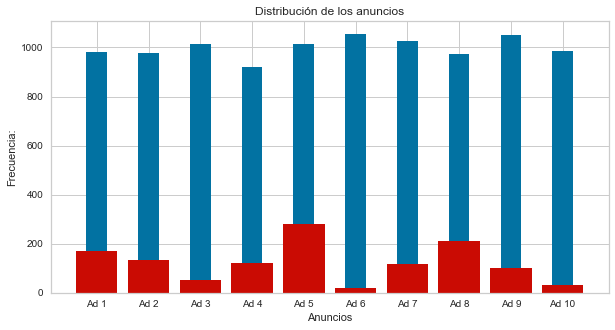

In [851]:
import random
random.seed(10)

'''En este modelo seleccionamos los anuncios de forma random. En vez de obtener las probabilidades
del dataset original, que lo haremos luego, vamos directamente a comprobar si se vió o no el anuncio en la 
exposición i del for.'''



N = 10000               #Número de iteraciones que vamos  realizar sobre el propio dataset
d = len(X_7.columns)                 # número de anuncios
total_reward_rand = 0   #aqui guardamos el número de clicks durante el loop

'''creo este dataframe para almacenar los resultados en cada iteración y visualizarlos'''
df_result = pd.DataFrame(0, index=range(N), columns=range(1, d+1)) 



ad_selected = []       #aqui guardamos los anuncios que se van mostrando

for i in range(0,N):   
    
    ad = random.randrange(1, d + 1 ) #elegimos al azar un anuncio entre los que tenemos
    ad_selected.append(ad) #lo almacenamos en la lista de anuncios mostrados
    reward = X_7.values[i,ad-1]   #buscamos el valor en el dataset en esa posición de fila y columna
    df_result.loc[i,ad]= reward #guardamos el valor en el dataframe que hemos creado a tal efecto
    total_reward_rand = total_reward_rand + reward #incrementamos el valor total de las recompensas

unique, counts =np.unique(ad_selected, return_counts=True)
anuncios_mostrados = list(zip(unique, counts))
print("El número de exposiciones tras la prueba, para cada anuncio, ha sido: ", anuncios_mostrados)
print("El anuncio más mostrado, tras la prueba, ha sido el:", np.argmax(counts) + 1)
print('Total anuncios visitados sin estrategia, mostrando un único anuncio: {}'.format(total_reward_rand))

anuncios_clickados = [df_result[col].sum() for col in df_result.columns ]
print("El anuncio más clickado, tras la prueba, ha sido el:", np.argmax(anuncios_clickados) + 1)



rewards_X_7 = [X_7[col].sum() for col in X_7.columns ]
prob_rewards_X7 = [x / 10000 for x in rewards_X_7]
prob_rewards_clickados = anuncios_clickados/counts

print("Las probabilidades según los datos originales eran para cada anuncio =", np.round(prob_rewards_X7,2))
print("Las probabilidades tras la prueba, son parecidas= ",  np.round(prob_rewards_clickados,2) )

'''por último hacemos un gráfico de las veces que ha sido mostrado un anuncio y las que ha sido clickado.
El anuncio más clickado ha sido el 5'''

fig = plt.figure(figsize = (10, 5)) 
plt.bar(X_7.columns, counts, color ='b',width = 0.4)
plt.bar(X_7.columns, anuncios_clickados,  color='r')
plt.xlabel("Anuncios")
plt.ylabel("Frecuencia:")
plt.title("Distribución de los anuncios")
plt.show()

In [856]:
from statsmodels.stats.proportion import proportions_ztest

max_reward = np.max(anuncios_clickados )



print([proportions_ztest((r, max_reward), (N, N))[1] for r in anuncios_clickados])


'''Según el proportions_test, podemos rechazar que el máximo número de clicks obtenidos por el anuncio 5 sea producto del azar; el pvalue de todas las distribuciones está por debajo del umbral del 5%'''


[7.366680464522708e-08, 1.455006910879038e-13, 4.275086670326519e-36, 1.4397560012552876e-15, 1.0, 3.1470769437460336e-53, 7.182967958718493e-17, 0.001013728358289223, 3.207641126847197e-20, 2.1977004508474477e-46]


'Según el proportions_test, podemos rechazar que el máximo número de clicks obtenidos por el anuncio 5 sea producto del azar; el pvalue de todas las distribuciones está por debajo del umbral del 5%'

In [776]:
'''creo una clase que me guarda las probabilidades con las que voy a trabajar a lo largo de
todos los experimentos y el número de anuncios.
También genero la función con la que iremos eligiendo el bandit
'''

class Env(object):
    
 def __init__(self, reward_probas):

    self.reward_probas = reward_probas
    self.k_arms = len(reward_probas)

 def choose_arm(self, arm):
       
    return np.random.binomial(1, self.reward_probas[arm])





In [777]:
'''asigno las probabilidades calculadas en el dataset original a la lista de probabilidades de la clase'''

environment = Env(reward_probas=prob_rewards_X7)
print(f"Reward Probas\t\t: {environment.reward_probas}")


Reward Probas		: [0.1703, 0.1295, 0.0728, 0.1196, 0.2695, 0.0126, 0.1112, 0.2091, 0.0952, 0.0489]


In [778]:

'''Volvemos a repetir el experimento randoms'''


class RandomAgent(object):

  def __init__(self, env, max_iterations=2000):
    self.env = env
    self.iterations = max_iterations

  def act(self):
    '''creamos estos tres arrays que nos van a almacenar, las medias calculadas
    como resultado de la división entre las recompensas y el número de veces que se ha mostrado el anuncio'''
    q_values = np.zeros(self.env.k_arms)
    arm_rewards = np.zeros(self.env.k_arms)
    arm_counts = np.zeros(self.env.k_arms)

    '''inicializamos estas dos listas para guardar las recompensas individuales que se van obteniendo
    por un lado y el acumulado de las mismas para hacer el gráfico posterior'''
    rewards = []
    cum_rewards = []
    
    '''empezamos con el bucle'''
    
    for i in range(1, self.iterations + 1):
      
      arm = np.random.choice(self.env.k_arms) #elegimos el bandit de forma random
      reward = self.env.choose_arm(arm)  #ejecutamos la función binomial de la clase para obtener la recompensa

      arm_rewards[arm] += reward #acumulamos la recompensa al bandit concreto
      arm_counts[arm] += 1 #acumulamos una exposición más del bandit
      q_values[arm] = arm_rewards[arm] / arm_counts[arm] #recalculamos la probabilidad para el bandit

      rewards.append(reward) #añadimos la recompensa indivisual a la lista de recompensas
      cum_rewards.append(sum(rewards)/ len(rewards)) #hallamos la recompensa ponderada y la añadimos a la lista para el gráfico
      

    return {"arms": arm_counts, "rewards": rewards, "cum_rewards": cum_rewards, "rew_brazos": arm_rewards }

#incializamos la clase con el número de iteraciones y la clase qhe hemos diseñado al principio
random_agent = RandomAgent(env=environment,max_iterations=10000)
#ejecutamos el bucle para obtener el resultado
ra_history = random_agent.act()
print(f"TOTAL REWARDS : {sum(ra_history['rewards'])}")


TOTAL REWARDS : 1210


Text(0.5, 1.0, 'Anuncios ofrecidos y clickados')

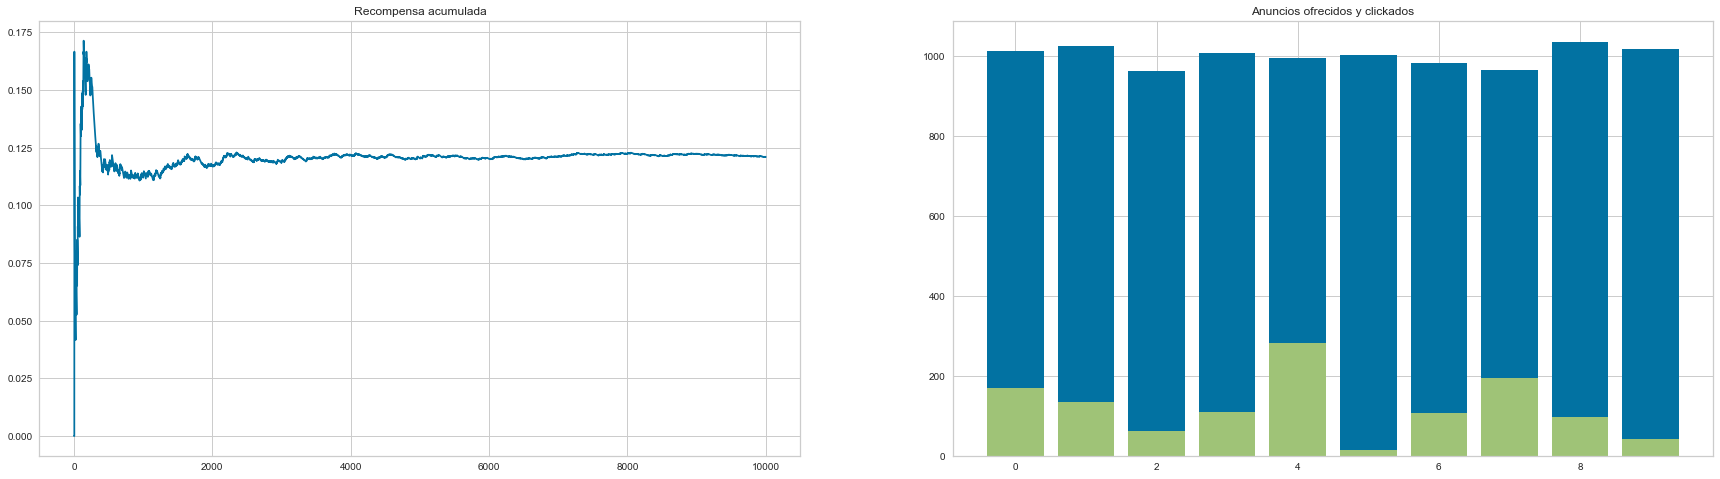

In [819]:
#realizamos el gráfico para este experimento
datos_graf = {}

rewards = ra_history["rewards"]
cum_rewards = ra_history["cum_rewards"]
chosen_arms = ra_history["arms"]
rew_brazos = ra_history["rew_brazos"]

datos_graf['Random']= [rewards,cum_rewards,chosen_arms, rew_brazos ]



rewards = ra_history["rewards"]
cum_rewards = ra_history["cum_rewards"]
chosen_arms = ra_history["arms"]
rew_brazos = ra_history["rew_brazos"]

fig = plt.figure(figsize=[30,8])
ax2 = fig.add_subplot(121)
ax2.plot(cum_rewards, label="Recompensa media")
ax2.set_title("Recompensa acumulada")

ax3 = fig.add_subplot(122)
ax3.bar([i for i in range(len(chosen_arms))], chosen_arms, label="chosen arms")
ax3.bar([i for i in range(len(chosen_arms))], rew_brazos, label="chosen arms")
ax3.set_title("Anuncios ofrecidos y clickados")

In [784]:
class EpsilonGreedyAgent(object):
    
    '''En el caso de Greedy, tenemos un parámetro inicial, epsilon, que nos marca el margen que 
    tenemos para explorar. Obtenemos un valor random; si ese valor es menor que epsilon, exploramos;
    si es mayor explotamos con la información acumulada'''

    def __init__(self, env, max_iterations=200, epsilon=0.01):
        self.env = env 
        self.iterations = max_iterations
        self.epsilon = epsilon 

    def act(self):
        #esta parte es igualpara todos los experimentos
        q_values = np.zeros(self.env.k_arms)
        arm_rewards = np.zeros(self.env.k_arms)
        arm_counts = np.zeros(self.env.k_arms)
        rewards = []
        cum_rewards = []

        for i in range(1, self.iterations + 1):
      
          #aquí es donde decidimos si exploramos o explotamos; cuanto mayor epsilon, más exploración. 
            arm = np.random.choice(self.env.k_arms) if np.random.random() < self.epsilon else np.argmax(q_values)
      
            #obtenemos el valor random de la recompensa
            reward = self.env.choose_arm(arm)
          
            #acumulamos como en el primer caso, para el gráfico
            arm_rewards[arm] += reward
            arm_counts[arm] += 1
            q_values[arm] = arm_rewards[arm]/arm_counts[arm]
            rewards.append(reward)
            cum_rewards.append(sum(rewards)/ len(rewards))
        
        return {"arms": arm_counts, "rewards": rewards, "cum_rewards": cum_rewards, "rew_brazos": arm_rewards }
            
    

In [820]:
#ejecutamos la función act de la clase

'''Hemos mejorado ostensiblemente el número de clicks obtenidos, aunque el anuncio ganador es el mismo'''

egreedy_agent = EpsilonGreedyAgent(environment, max_iterations=10000, epsilon=0.1)
eg_history = egreedy_agent.act()
print(f"TOTAL REWARD : {sum(eg_history['rewards'])}")

TOTAL REWARD : 2486


Text(0.5, 1.0, 'Anuncios ofrecidos y clickados')

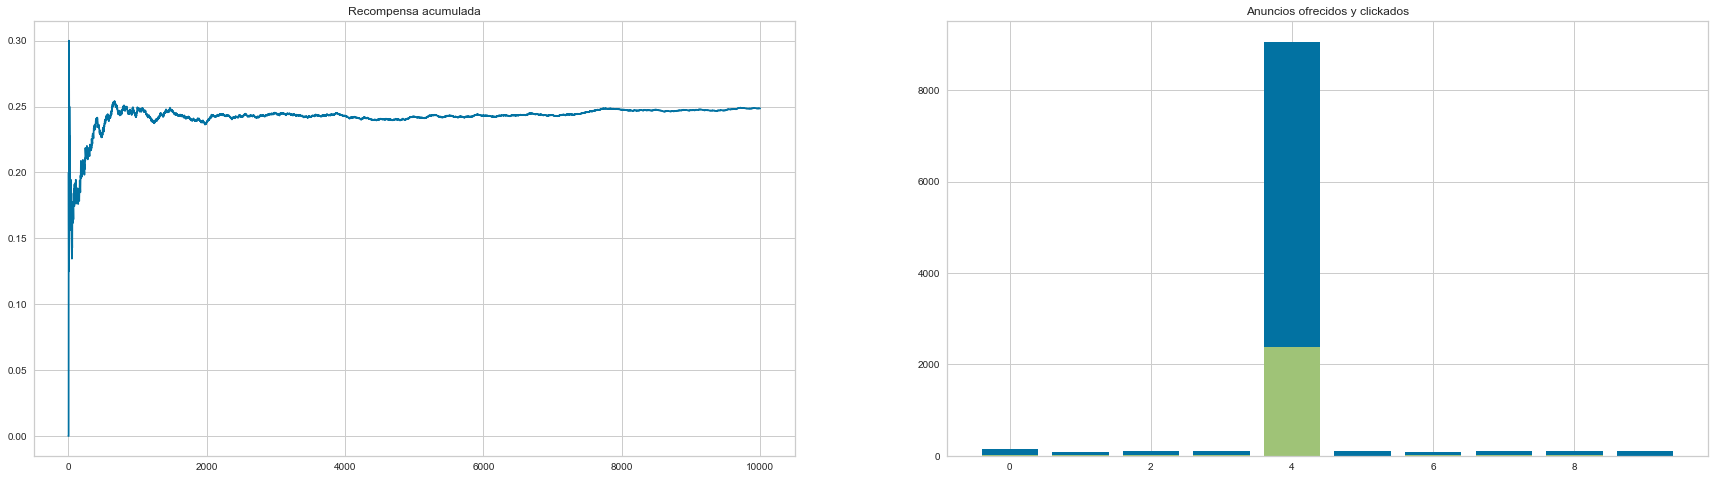

In [821]:
rewards = eg_history["rewards"]
cum_rewards = eg_history["cum_rewards"]
chosen_arms = eg_history["arms"]
rew_brazos = eg_history["rew_brazos"]

datos_graf['Greedy0.1']= [rewards,cum_rewards,chosen_arms, rew_brazos ]



fig = plt.figure(figsize=[30,8])
ax2 = fig.add_subplot(121)
ax2.plot(cum_rewards, label="Recompensa media")
ax2.set_title("Recompensa acumulada")

ax3 = fig.add_subplot(122)
ax3.bar([i for i in range(len(chosen_arms))], chosen_arms, label="chosen arms")
ax3.bar([i for i in range(len(chosen_arms))], rew_brazos, label="chosen arms")
ax3.set_title("Anuncios ofrecidos y clickados")

TOTAL REWARD : 1381


Text(0.5, 1.0, 'Anuncios ofrecidos y clickados')

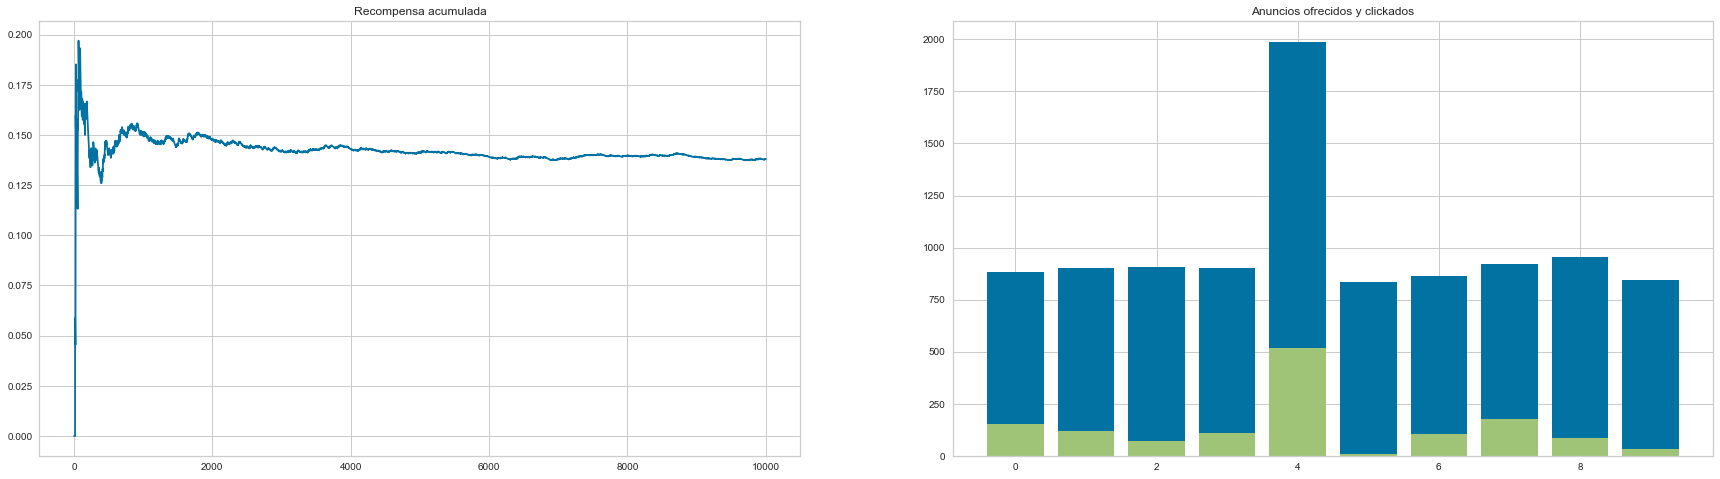

In [822]:
'''Hacemos el mismo experimento pero aumentando epsilon y podemos observar
que el algoritmo prueba con más anuncios y explota menos, con lo cual la recompensa total es menor'''

egreedy_agent = EpsilonGreedyAgent(environment, max_iterations=10000, epsilon=0.9)
eg_history = egreedy_agent.act()
print(f"TOTAL REWARD : {sum(eg_history['rewards'])}")

rewards = eg_history["rewards"]
cum_rewards = eg_history["cum_rewards"]
chosen_arms = eg_history["arms"]
rew_brazos = eg_history["rew_brazos"]

datos_graf['Greedy0.9']= [rewards,cum_rewards,chosen_arms, rew_brazos ]

fig = plt.figure(figsize=[30,8])
ax2 = fig.add_subplot(121)
ax2.plot(cum_rewards, label="Recompensa media")
ax2.set_title("Recompensa acumulada")

ax3 = fig.add_subplot(122)
ax3.bar([i for i in range(len(chosen_arms))], chosen_arms, label="chosen arms")
ax3.bar([i for i in range(len(chosen_arms))], rew_brazos, label="chosen arms")
ax3.set_title("Anuncios ofrecidos y clickados")

TOTAL REWARD : 2038


Text(0.5, 1.0, 'Anuncios ofrecidos y clickados')

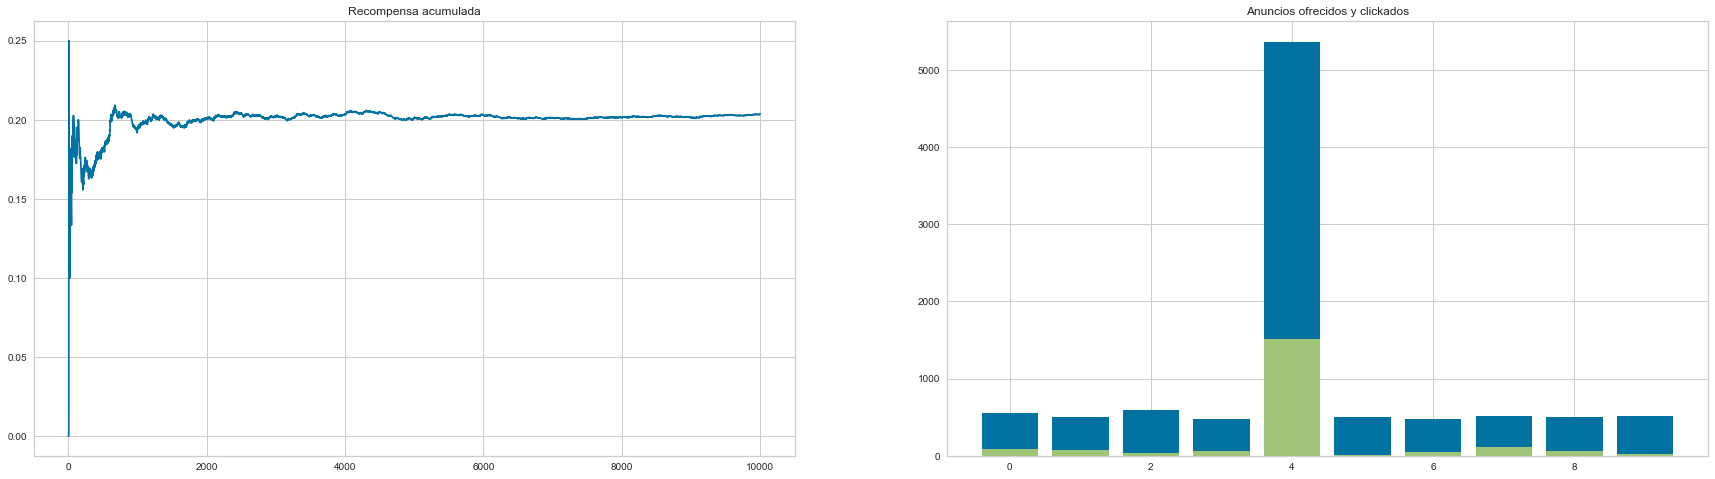

In [823]:
'''en este caso utilizamos un valor medio del epsilon, y obtenemos un valor también promedio de ganancia total.

'''

egreedy_agent = EpsilonGreedyAgent(environment, max_iterations=10000, epsilon=0.5)
eg_history = egreedy_agent.act()
print(f"TOTAL REWARD : {sum(eg_history['rewards'])}")

rewards = eg_history["rewards"]
cum_rewards = eg_history["cum_rewards"]
chosen_arms = eg_history["arms"]
rew_brazos = eg_history["rew_brazos"]

datos_graf['Greedy0.5']= [rewards,cum_rewards,chosen_arms, rew_brazos ]

fig = plt.figure(figsize=[30,8])
ax2 = fig.add_subplot(121)
ax2.plot(cum_rewards, label="Recompensa media")
ax2.set_title("Recompensa acumulada")

ax3 = fig.add_subplot(122)
ax3.bar([i for i in range(len(chosen_arms))], chosen_arms, label="chosen arms")
ax3.bar([i for i in range(len(chosen_arms))], rew_brazos, label="chosen arms")
ax3.set_title("Anuncios ofrecidos y clickados")


In [824]:
'''ahora implemento el experimento UCB1. La estructura del experimento es la misma, pero en este caso y los que vienen
después, el aspecto diferenciador es el método de selección del bandit'''

class UCBAgent(object):

  def __init__(self, env, max_iterations=200):
    self.env = env
    self.iterations = max_iterations
  

  def act(self):
    q_values = np.zeros(self.env.k_arms, dtype=np.float32)
    arm_counts = np.zeros(self.env.k_arms, dtype=np.int)
    arm_rewards = np.zeros(self.env.k_arms, dtype=np.float32)
   
    rewards = []
    cum_rewards = []

    for i in range(0, self.iterations + 1):
      
        ################El método de selección empieza aquí
    
      if i < len(q_values):       
        
        arm = i #Si no hemos evaluado la media para todos los bandits, dejamos correr el bandit
                 #hasta tener unos promedios iniciales
      
      else:
            
        U = np.sqrt(2*np.log(i) / arm_counts)
                
                #seleccionamos el bandit donde tenemos el máximo de sumar a las medias previas
                #la cantidad obtenida en el paso anterior en función del número de iteraciones totales
                #y las de cada bandit
        
        arm = np.argmax(q_values + U)
        
        #########acaba aquí

      reward = self.env.choose_arm(arm)


      arm_rewards[arm] += reward
      arm_counts[arm] += 1
      q_values[arm] = arm_rewards[arm] / arm_counts[arm]
      rewards.append(reward)
      cum_rewards.append(sum(rewards)/len(rewards))

    return {"arms": arm_counts, "rewards": rewards, "cum_rewards": cum_rewards, "rew_brazos": arm_rewards }







C:\Users\JULIAN\AppData\Local\Temp\ipykernel_9336\633134949.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  arm_counts = np.zeros(self.env.k_arms, dtype=np.int)


TOTAL REWARDS : 2124


Text(0.5, 1.0, 'Anuncios ofrecidos y clickados')

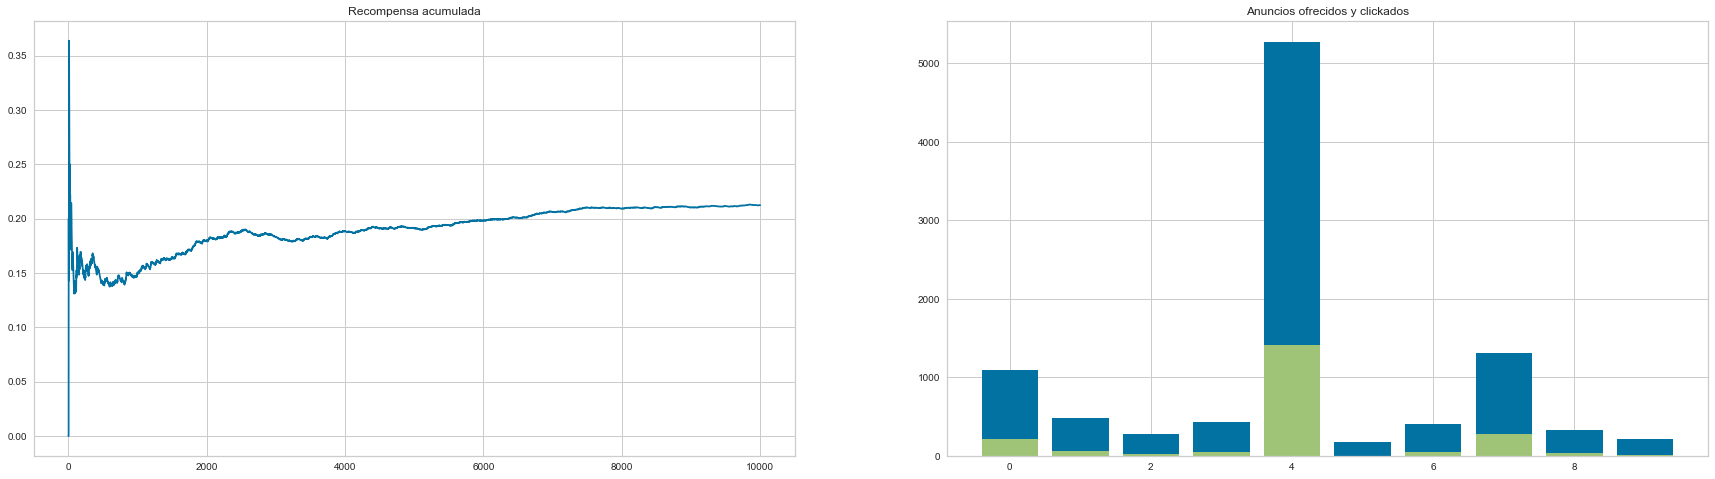

In [825]:
ucb_agent = UCBAgent(environment, max_iterations=10000)
ucb_history = ucb_agent.act()
print(f"TOTAL REWARDS : {sum(ucb_history['rewards'])}")

rewards = ucb_history["rewards"]
cum_rewards = ucb_history["cum_rewards"]
chosen_arms = ucb_history["arms"]
rew_brazos = ucb_history["rew_brazos"]

datos_graf['UCB1']= [rewards,cum_rewards,chosen_arms, rew_brazos ]

fig = plt.figure(figsize=[30,8])
ax2 = fig.add_subplot(121)
ax2.plot(cum_rewards, label="Recompensa media")
ax2.set_title("Recompensa acumulada")

ax3 = fig.add_subplot(122)
ax3.bar([i for i in range(len(chosen_arms))], chosen_arms, label="chosen arms")
ax3.bar([i for i in range(len(chosen_arms))], rew_brazos, label="chosen arms")
ax3.set_title("Anuncios ofrecidos y clickados")

In [826]:
import math
class UCB2Agent(object):
    def __init__(self, env, max_iterations=200, alpha = 0.1):
        self.env = env
        self.iterations = max_iterations
        self.alpha = alpha

  
    def act(self):
        q_values = np.zeros(self.env.k_arms, dtype=np.float32)
        arm_counts = np.zeros(self.env.k_arms, dtype=np.int)
        arm_rewards = np.zeros(self.env.k_arms, dtype=np.float32)
    
        rewards = []
        cum_rewards = []
    
        for x in range(1, self.iterations + 1):
      
            arms = self.env.k_arms
            total = len(rewards)
            
             ################El método de selección empieza aquí
            if total == 0:
                arm = np.random.choice(arms) #En la primera iteración elegimos un bandit al azar
                
            else:
            
                ucb = [0] * arms #creamos para cada iteración una lista temporal
            
                for i in range(arms):
                    #para todo el intervalo de bandits hacemos el cálculo de la parte inferior
                    
                    try:
                        #aqui tenemos en cuenta las veces que se ha mostrado el bandit
                        tau = int(np.ceil((1 + self.alpha) ** arm_counts[i]))
                        
                        
                        #aqui el número total de iteraciones
                        if np.log(np.e * x / tau) > 0:
                            bonus = np.sqrt((1. + self.alpha) * np.log(np.e * x / tau) / (2 * tau))
                        else:
                            bonus = 0
                    except:
                            bonus = 0
                    
                    if np.isnan(bonus):
                            ucb[i] = q_values[i] 
                    else:
                            ucb[i] = q_values[i] + bonus
            
                #seleccionamos entre los máximos de los valores calculados
                max_arms = np.where(ucb == np.max(ucb))[0]
                arm = np.random.choice(max_arms)
                
              #########acaba aquí
            
            reward = self.env.choose_arm(arm)
            
            arm_rewards[arm] += reward
            arm_counts[arm] += 1
            q_values[arm] = arm_rewards[arm] / arm_counts[arm]
            rewards.append(reward)        
            cum_rewards.append(sum(rewards)/len(rewards))
    
        return {"arms": arm_counts, "rewards": rewards, "cum_rewards": cum_rewards, "rew_brazos": arm_rewards }


C:\Users\JULIAN\AppData\Local\Temp\ipykernel_9336\2327054581.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  arm_counts = np.zeros(self.env.k_arms, dtype=np.int)
C:\Users\JULIAN\AppData\Local\Temp\ipykernel_9336\2327054581.py:35: RuntimeWarning: overflow encountered in power
  tau = int(np.ceil((1 + self.alpha) ** arm_counts[i]))


TOTAL REWARDS : 2680


Text(0.5, 1.0, 'Anuncios ofrecidos y clickados')

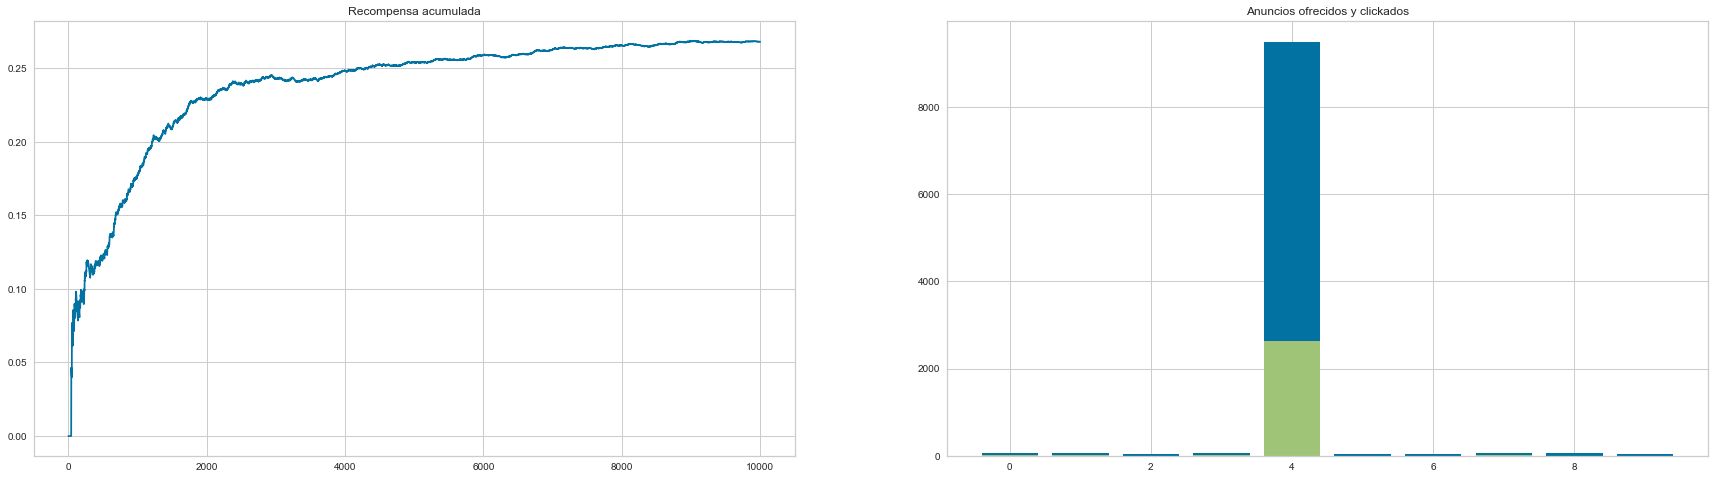

In [827]:
'''es el mejor resultado hasta el momento'''

ucb2_agent = UCB2Agent(environment, max_iterations=10000, alpha = 0.1)
ucb2_history = ucb2_agent.act()
print(f"TOTAL REWARDS : {sum(ucb2_history['rewards'])}")

rewards = ucb2_history["rewards"]
cum_rewards = ucb2_history["cum_rewards"]
chosen_arms = ucb2_history["arms"]
rew_brazos = ucb2_history["rew_brazos"]

datos_graf['UCB2']= [rewards,cum_rewards,chosen_arms, rew_brazos ]

fig = plt.figure(figsize=[30,8])
ax2 = fig.add_subplot(121)
ax2.plot(cum_rewards, label="Recompensa media")
ax2.set_title("Recompensa acumulada")

ax3 = fig.add_subplot(122)
ax3.bar([i for i in range(len(chosen_arms))], chosen_arms, label="chosen arms")
ax3.bar([i for i in range(len(chosen_arms))], rew_brazos, label="chosen arms")
ax3.set_title("Anuncios ofrecidos y clickados")


In [828]:

class ThompsonSamplingAgent(object):

  def __init__(self, env, max_iterations=2000):
    self.env = env
    self.iterations = max_iterations

  def act(self):
    q_values = np.zeros(self.env.k_arms)
    smax_values = np.zeros(self.env.k_arms)
    arm_rewards = np.zeros(self.env.k_arms)
    arm_counts = np.zeros(self.env.k_arms)

    alpha = np.ones(self.env.k_arms)
    beta = np.ones(self.env.k_arms)

    rewards = []
    cum_rewards = []
    
    ################El método de selección empieza aquí
    for i in range(1, self.iterations):
        
      #para cada iteración utilizamos esta expresión matemática, considernado que N= 1
    
      samples = np.array([np.random.beta(alpha[i]+1, beta[i]+1) for i in range(self.env.k_arms)])
      arm = np.argmax(samples)
      
      ################acaba aquí
      reward = self.env.choose_arm(arm)

      arm_rewards[arm] += reward
      arm_counts[arm] += 1 
      q_values[arm] = arm_rewards[arm]/arm_counts[arm]

      rewards.append(reward)
      cum_rewards.append(sum(rewards)/ len(rewards))

      #aqui acumulamos los promedios de alpha y beta para cada bandit 
      if reward > 0:
        alpha[arm] += reward
      else:
        beta[arm] += (1-reward)

    return {"arms": arm_counts, "rewards": rewards, "cum_rewards": cum_rewards, "rew_brazos": arm_rewards }

TOTAL REWARDS : 2592


Text(0.5, 1.0, 'Anuncios ofrecidos y clickados')

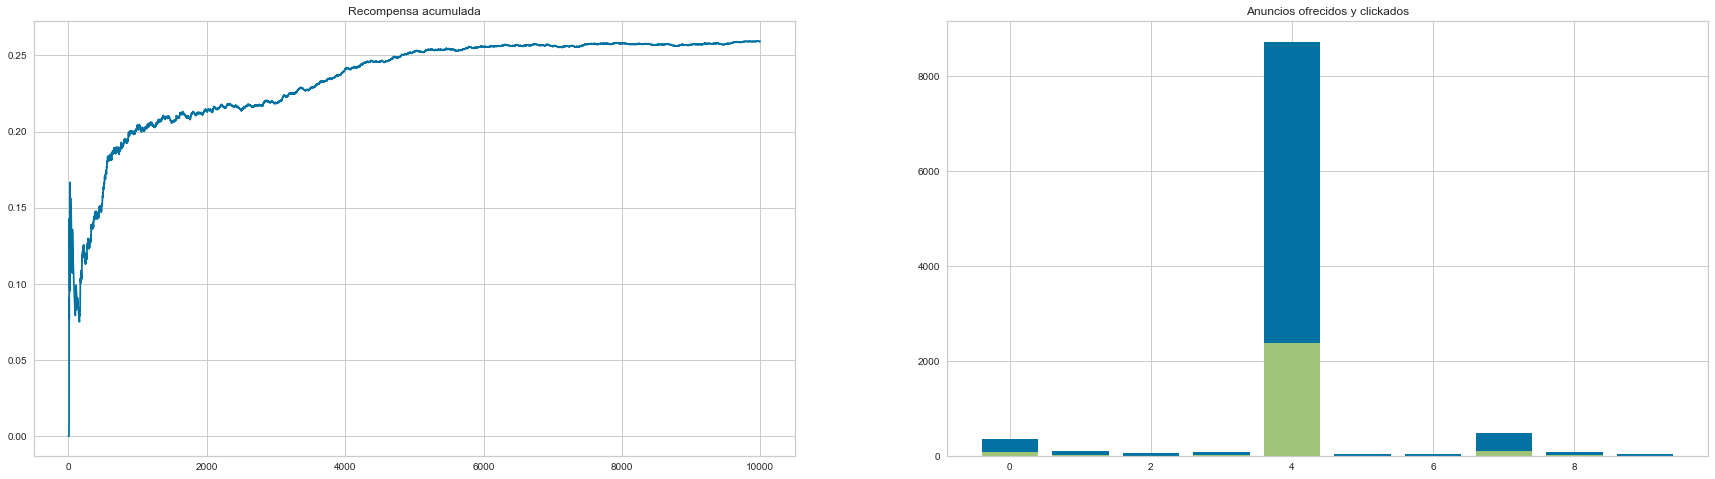

In [829]:
Thompson_agent = ThompsonSamplingAgent(environment, max_iterations=10000)
Thompson_history = Thompson_agent.act()
print(f"TOTAL REWARDS : {sum(Thompson_history['rewards'])}")

rewards = Thompson_history["rewards"]
cum_rewards =Thompson_history["cum_rewards"]
chosen_arms =Thompson_history["arms"]
rew_brazos = Thompson_history["rew_brazos"]

datos_graf['Thompson']= [rewards,cum_rewards,chosen_arms, rew_brazos ]

fig = plt.figure(figsize=[30,8])
ax2 = fig.add_subplot(121)
ax2.plot(cum_rewards, label="Recompensa media")
ax2.set_title("Recompensa acumulada")

ax3 = fig.add_subplot(122)
ax3.bar([i for i in range(len(chosen_arms))], chosen_arms, label="chosen arms")
ax3.bar([i for i in range(len(chosen_arms))], rew_brazos, label="chosen arms")
ax3.set_title("Anuncios ofrecidos y clickados")

In [830]:
class Bayes(object):

  def __init__(self, env, max_iterations=2000, N= 1, gamma = 3):
    self.env = env
    self.iterations = max_iterations
    self.N = N
    self.gamma = gamma

  def act(self):
    q_values = np.zeros(self.env.k_arms)
    smax_values = np.zeros(self.env.k_arms)
    arm_rewards = np.zeros(self.env.k_arms)
    arm_counts = np.zeros(self.env.k_arms)

    #alpha = np.ones(self.env.k_arms, dtype=int)
    #beta = np.ones(self.env.k_arms, dtype=int)
    
    rewards = []
    cum_rewards = []
    arms = self.env.k_arms
    alphas = [1]* arms
    betas =   [1]* arms
    
    
    for i in range(1, self.iterations):
          ################El método de selección empieza aquí
        bayes = [0] * arms
        for x in range(arms):            
           
            bayes[x] = q_values[x] +  beta.std(alphas[x], betas[x]) * self.gamma
            
         #bayes[i] = self._mean[i] + beta.std(self._alpha[i], self._beta[i]) * self.gamma
        max_bandits = np.where(bayes == np.max(bayes))[0]
        arm = np.random.choice(max_bandits)
           
            ################acaba aquí
          
        
        reward = self.env.choose_arm(arm)
        arm_rewards[arm] += reward
        arm_counts[arm] += 1 
        q_values[arm] = arm_rewards[arm]/arm_counts[arm]

        rewards.append(reward)
        cum_rewards.append(sum(rewards)/ len(rewards))

        if reward > 0:
            alphas[arm] += reward
        else:
            betas[arm] += (1-reward)
        
           

    return {"arms": arm_counts, "rewards": rewards, "cum_rewards": cum_rewards, "rew_brazos": arm_rewards }




TOTAL REWARDS : 2634


Text(0.5, 1.0, 'Anuncios ofrecidos y clickados')

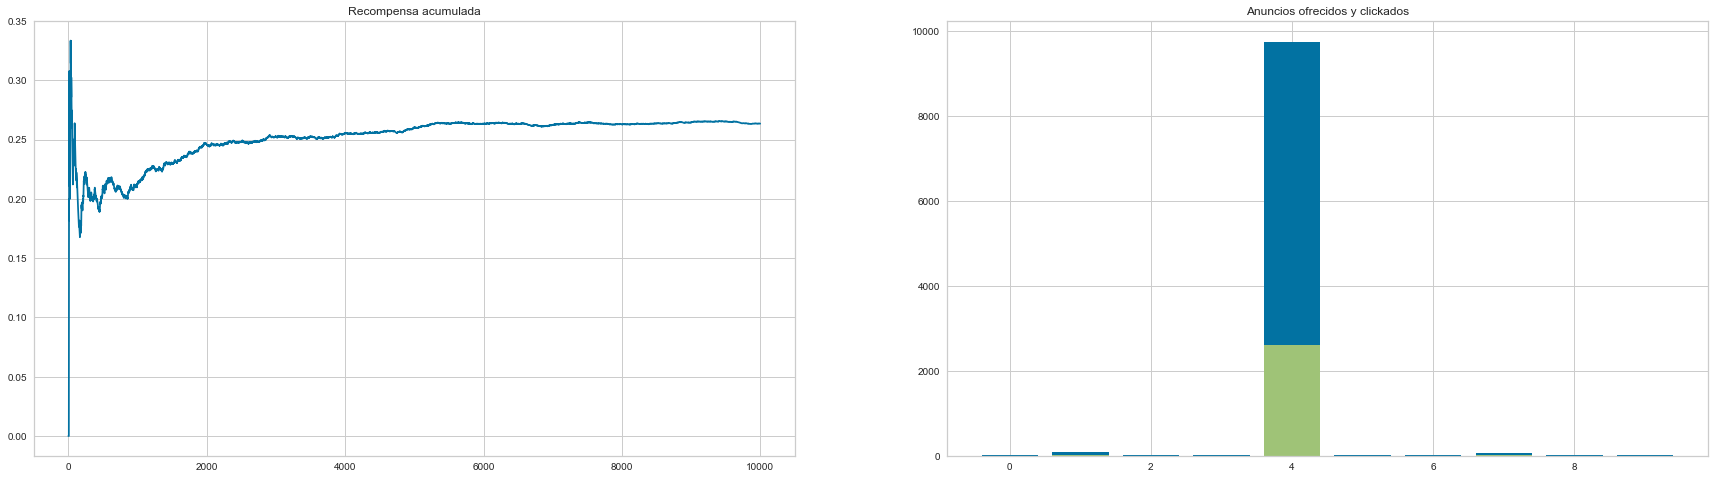

In [831]:
Bayes_agent = Bayes(environment, max_iterations=10000)
Bayes_history = Bayes_agent.act()
print(f"TOTAL REWARDS : {sum(Bayes_history['rewards'])}")

rewards = Bayes_history["rewards"]
cum_rewards =Bayes_history["cum_rewards"]
chosen_arms =Bayes_history["arms"]
rew_brazos = Bayes_history["rew_brazos"]

datos_graf['Bayes']= [rewards,cum_rewards,chosen_arms, rew_brazos ]

fig = plt.figure(figsize=[30,8])
ax2 = fig.add_subplot(121)
ax2.plot(cum_rewards, label="Recompensa media")
ax2.set_title("Recompensa acumulada")

ax3 = fig.add_subplot(122)
ax3.bar([i for i in range(len(chosen_arms))], chosen_arms, label="chosen arms")
ax3.bar([i for i in range(len(chosen_arms))], rew_brazos, label="chosen arms")
ax3.set_title("Anuncios ofrecidos y clickados")


Text(0.5, 1.0, 'Recompensa acumulada')

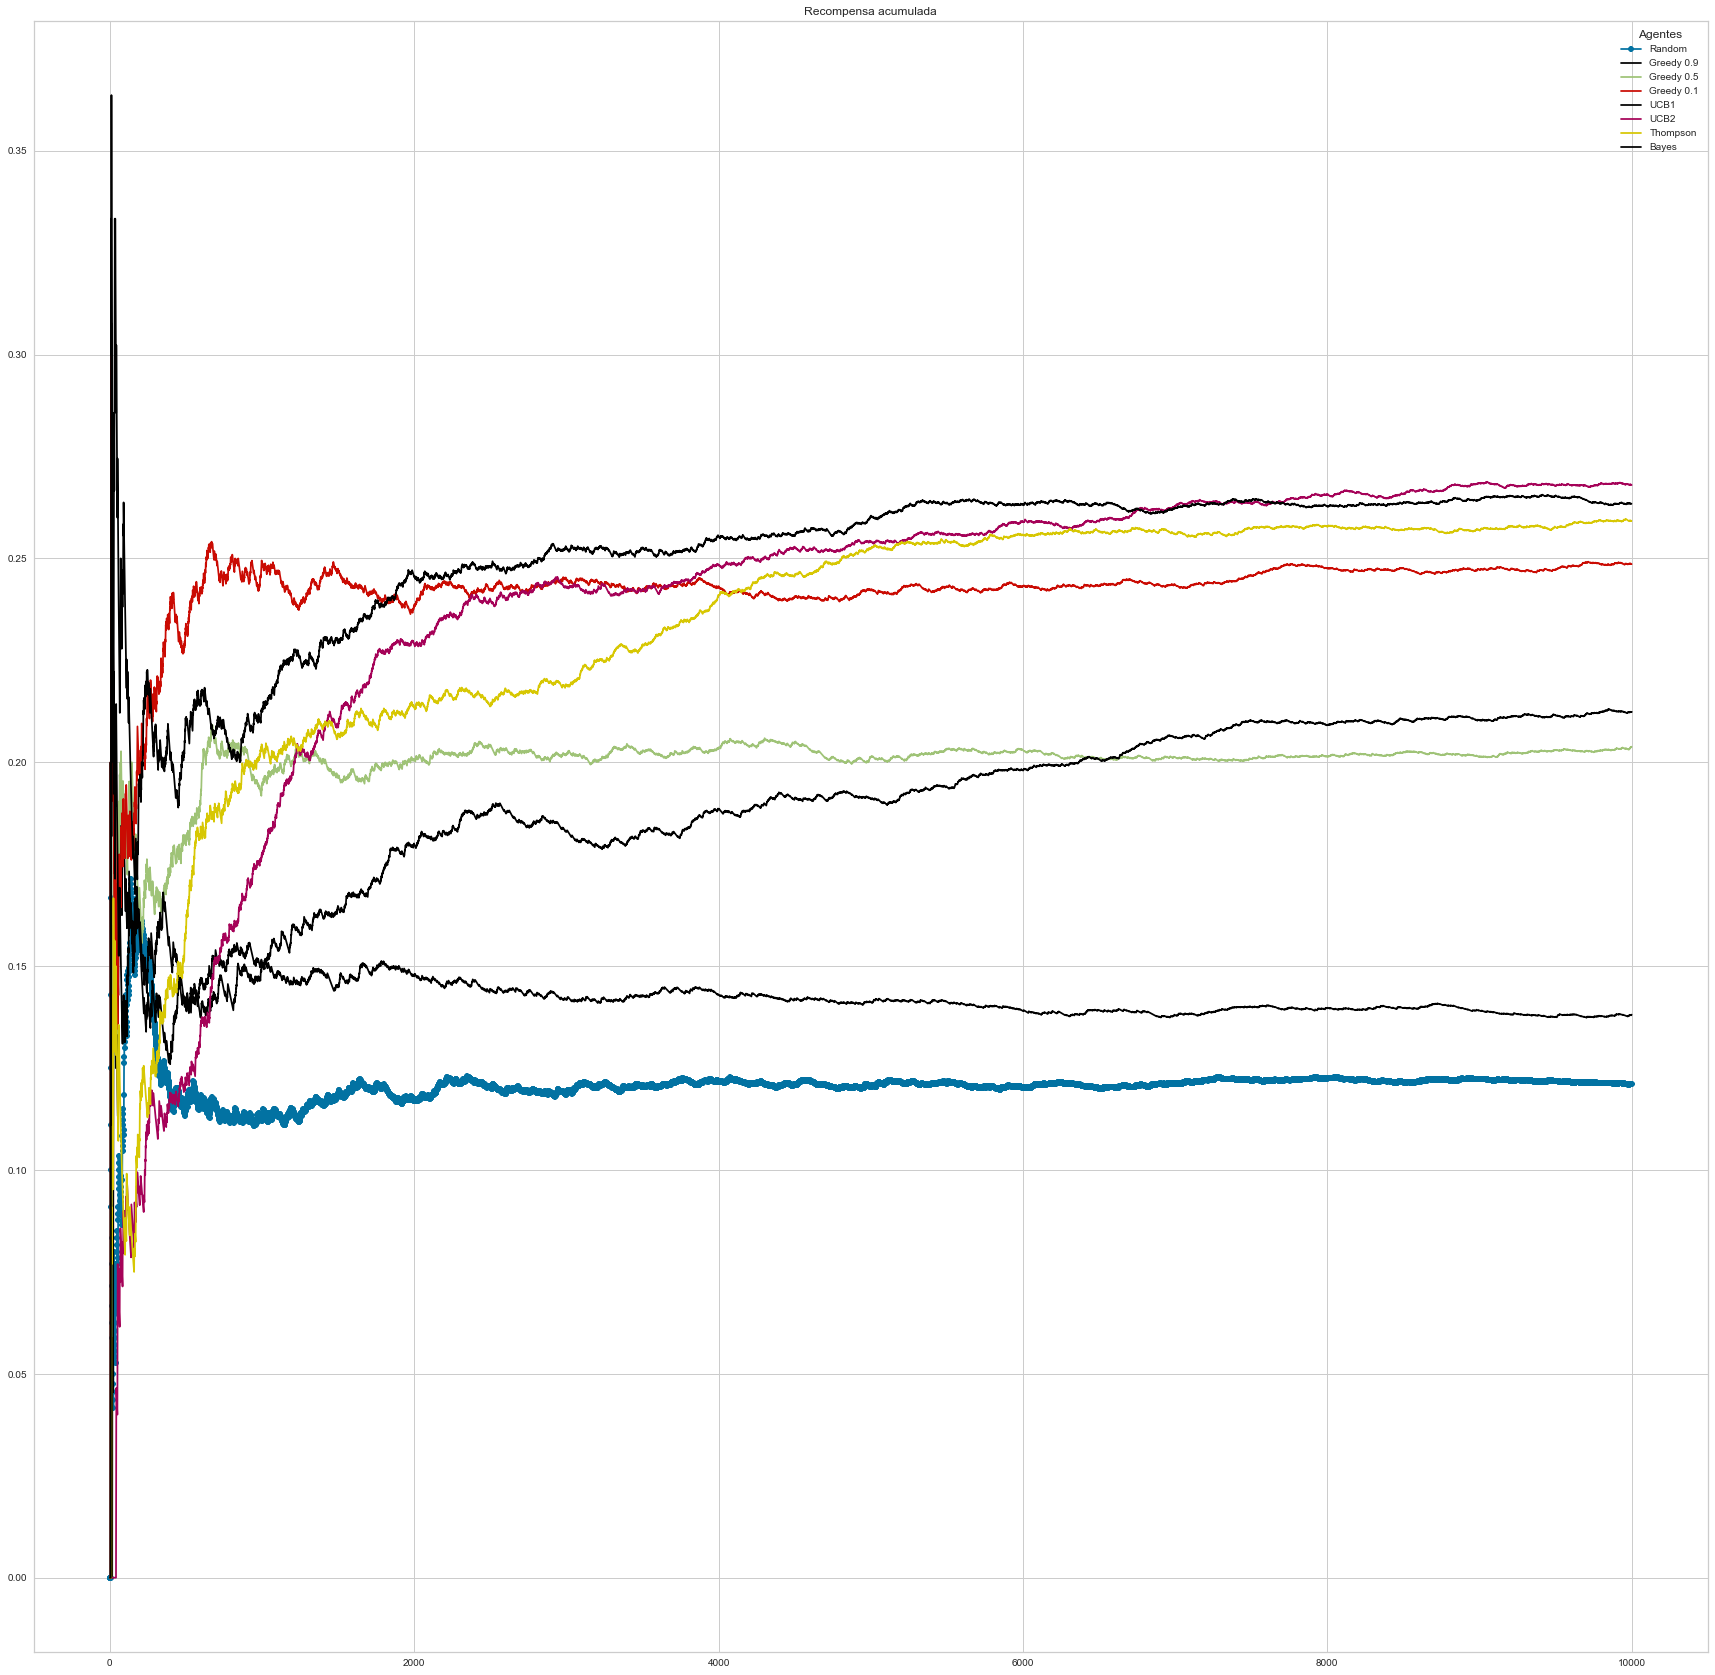

In [846]:
'''Ahora ponemos en un gráfico la evolución de la recompensa media acumulada para todos los agentes'''


fig = plt.figure(figsize=[30,30])



print()

plt.plot(datos_graf['Random'][1], label="Random")
plt.plot(datos_graf['Greedy0.9'][1], label="Greedy 0.9", color = 'black')
plt.plot(datos_graf['Greedy0.5'][1], label="Greedy 0.5")
plt.plot(datos_graf['Greedy0.1'][1], label="Greedy 0.1")
plt.plot(datos_graf['UCB1'][1], label="UCB1", color = 'black')
plt.plot(datos_graf['UCB2'][1], label="UCB2")
plt.plot(datos_graf['Thompson'][1], label="Thompson")
plt.plot(datos_graf['Bayes'][1], label="Bayes", color = 'black')
plt.legend(title = "Agentes")


plt.title("Recompensa acumulada")



Text(0.5, 1.0, 'Recompensa acumulada')

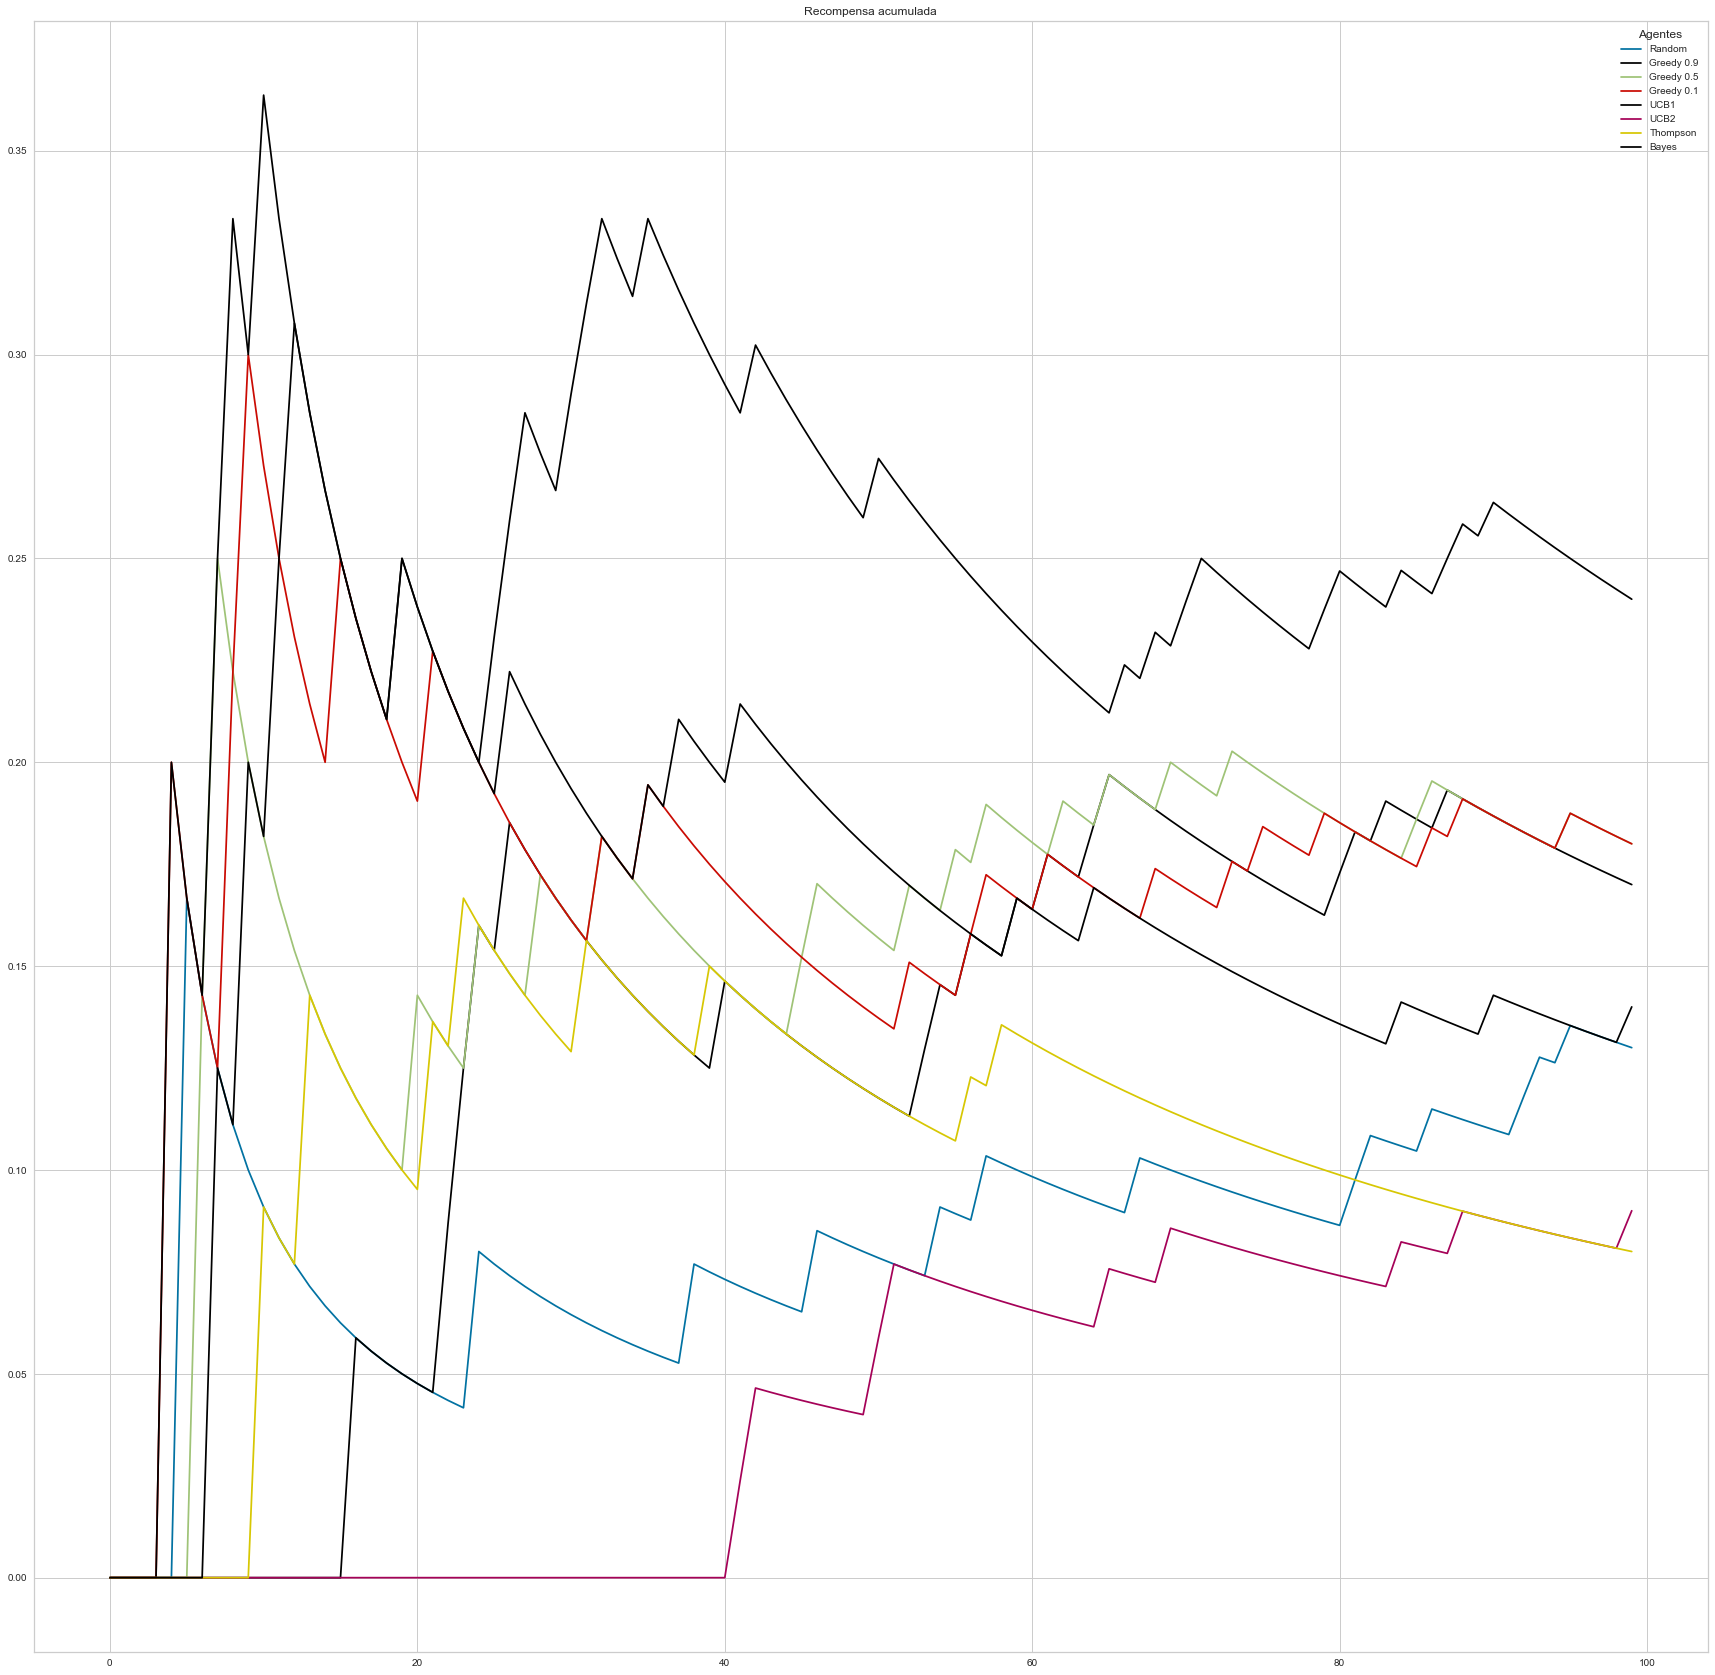

In [850]:

'''En este otro gráfico imprimimos las 100 primeras exposiciones para ver el arranque de las curvas
del gráfico anterior'''

fig = plt.figure(figsize=[30,30])





plt.plot(datos_graf['Random'][1][0:100], label="Random")
plt.plot(datos_graf['Greedy0.9'][1][0:100], label="Greedy 0.9", color = 'black')
plt.plot(datos_graf['Greedy0.5'][1][0:100], label="Greedy 0.5")
plt.plot(datos_graf['Greedy0.1'][1][0:100], label="Greedy 0.1")
plt.plot(datos_graf['UCB1'][1][0:100], label="UCB1", color = 'black')
plt.plot(datos_graf['UCB2'][1][0:100], label="UCB2")
plt.plot(datos_graf['Thompson'][1][0:100], label="Thompson")
plt.plot(datos_graf['Bayes'][1][0:100], label="Bayes", color = 'black')
plt.legend(title = "Agentes")


plt.title("Recompensa acumulada")

In [ ]:
''''EL modelo que más clicks ha recibido ha sido el UCB2 si los cálculos no me han fallado'''
'''El anuncio elegido por todos los modelos es el número 5'''